Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

On the dataset:

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling_5000.csv to Bank_Personal_Loan_Modelling_5000.csv


In [3]:
import io
bank_data = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling_5000.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank_data.describe()

ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]

In [8]:
bank_data.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

Information on the features or attributes:

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

Credit Card - Does the customer use a credit card issued by UniversalBank?

Integer Variables are as below:

Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

Family - Family size of the customer

Education - education level of the customer

The nominal variable is :

ID

Zip Code

In [9]:
# No columns have null data in the file
bank_data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [40]:
bank_data.dtypes

ID                     object
Age                     int64
Experience            float64
Income                  int64
ZIP Code               object
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [83]:
bank_data['Securities Account'].corr(bank_data['Personal Loan'])*100
#is sec acc affecting personal loan?

2.195388221631133

Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60


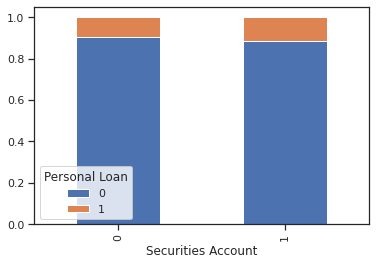

In [71]:
security_acc = pd.crosstab(bank_data['Securities Account'], bank_data['Personal Loan'])
security_acc.div(security_acc.sum(1), axis=0).plot(kind='bar', stacked=True)
print(security_acc)
#is sec acc affecting personal loan?

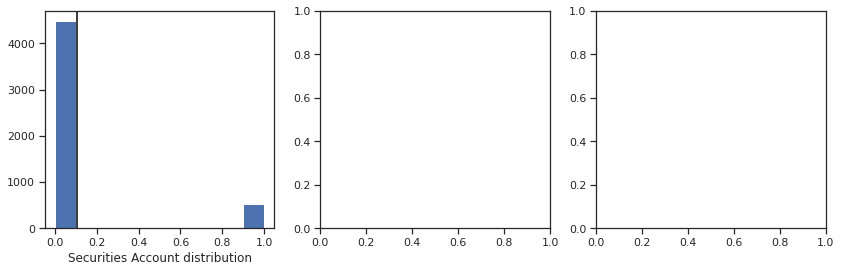

In [85]:
#Plotting Histograms for variables---
#cols = ['Experience', 'Mortgage']
fig, [ax0,ax1,ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(bank_data['Securities Account'])
ax0.set_xlabel('Securities Account distribution')
ax0.axvline(bank_data['Securities Account'].mean(), color = "black")


In [92]:
bank_data['Mortgage'].corr(bank_data['Personal Loan'])*100
#is mortgage affecting personal loan?

14.209523632788311

In [93]:
# Calculate the 75th percentile 
!pip install empiricaldist
from empiricaldist import Pmf, Cdf

cdf_income = Cdf.from_seq(bank_data['Mortgage'])

np.percentile(bank_data.Mortgage.sort_values(),75)

percentile_75th = cdf_income.inverse(0.75)
print(percentile_75th)


101.0


In [94]:
len(bank_data[bank_data['Mortgage'] <=101]) / 5000 * 100

75.16000000000001

In [11]:
#finding unique data
#bank_data.apply(lambda x: len(x.unique()))
#bank_data.unique() 
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

get the summary of the variables before and after converting the two variables into string.

In [12]:
#Column 'ID' and 'ZIP Code' should be of 'Str' type
bank_data[['ID','ZIP Code']] = bank_data[['ID','ZIP Code']].astype('str')
bank_data[['ID', 'ZIP Code']].dtypes

ID          object
ZIP Code    object
dtype: object

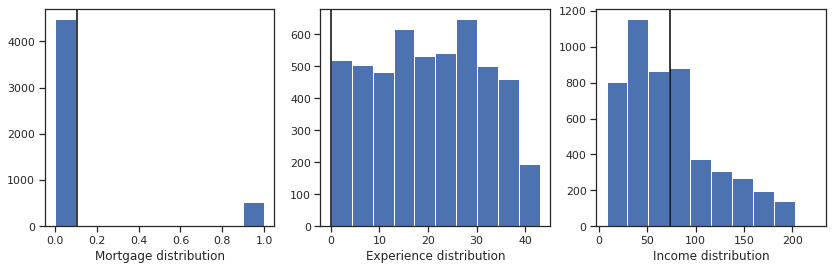

In [70]:
#Plotting Histograms for variables---
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(bank_data['Mortgage'])
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(bank_data['Mortgage'].mean(), color = "black")

ax1.hist(bank_data.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");


ax2.hist(bank_data.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(bank_data.Income.mean(), color = "black");

Dealing with Errorneous data

In [14]:
# there are records with negative experience. Before proceeding any further we need to clean the same
bank_data[bank_data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Delete erroneous records.

Impute the erroneous values with some logical value.

Selecting a logical value - Distribution of the variable shouldn't change much.

Finding the variables that has strong association with 'Experience'

what is the difference between finding the association using correlation and scatter plot?

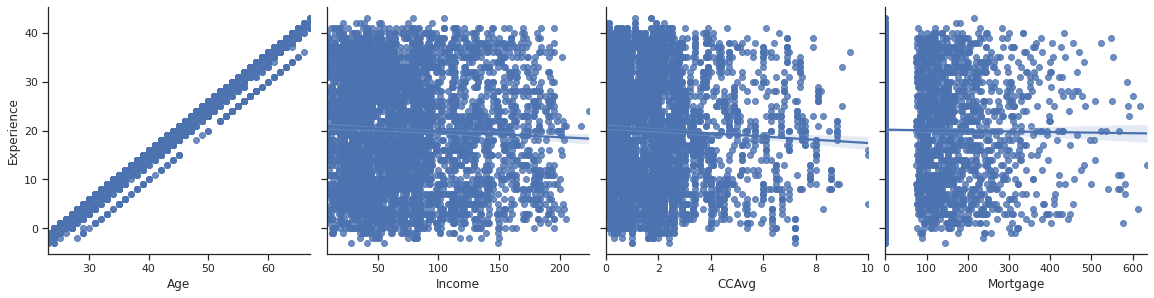

In [15]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(bank_data, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

In [16]:
bank_data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

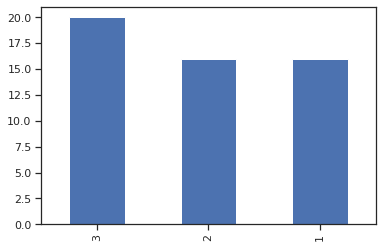

In [17]:
neg_ex=bank_data.loc[bank_data['Experience']<0,'Education'].value_counts()
neg_ex.plot.bar()

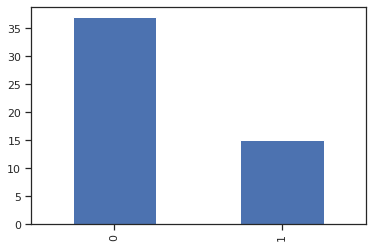

In [18]:
neg_ex_1=bank_data.loc[bank_data['Experience']<0,'CreditCard'].value_counts()
neg_ex_1.plot.bar()

Find the correlation between Experience and other four variables in the scatter plot.

'Age' has a very strong association with 'Experience. Get the subset of 'Age' data with negative values in 'Experience.

In [19]:
bank_data.loc[bank_data['Experience'] < 0, 'Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

some of the younger people have Negative experience. So we will look at other younger people with positive experience. Then take a mean and replace the negative values with the mean.

In [21]:
#Get a list of 'Age' values where we found some negative values in 'Experience'
ages = bank_data[bank_data['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [23]:
#Get indexes of negative values in 'Experience'
indexes = bank_data[bank_data['Experience'] < 0].index.tolist()
indexes

[89,
 226,
 315,
 451,
 524,
 536,
 540,
 576,
 583,
 597,
 649,
 670,
 686,
 793,
 889,
 909,
 1173,
 1428,
 1522,
 1905,
 2102,
 2430,
 2466,
 2545,
 2618,
 2717,
 2848,
 2876,
 2962,
 2980,
 3076,
 3130,
 3157,
 3279,
 3284,
 3292,
 3394,
 3425,
 3626,
 3796,
 3824,
 3887,
 3946,
 4015,
 4088,
 4116,
 4285,
 4411,
 4481,
 4514,
 4582,
 4957]

In [24]:
#Replace nagative 'Experience' values with the means
for i in indexes:
    for x in ages:
        bank_data.loc[i,'Experience'] = bank_data[(bank_data.Age == x) & (bank_data.Experience > 0)].Experience.mean()

plot the ditribution of 'Experience' before and after replacing the values with median.

replace the Experience with 'mean' and then plot the distribution

relace the experience with any other logical value and plot the distribution

Is there a differene in the distribution?

which imputation is better?

In [25]:
bank_data['Personal Loan'].value_counts()/bank_data.shape[0]

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Quantitative Variables correlation

In [26]:
quant_df = bank_data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage','Experience']].copy()
quant_df.corr()

Personal Loan       Age  ...  Mortgage  Experience
Personal Loan       1.000000 -0.007726  ...  0.142095   -0.008338
Age                -0.007726  1.000000  ... -0.012539    0.994010
Income              0.502462 -0.055269  ...  0.206806   -0.046959
CCAvg               0.366889 -0.052012  ...  0.109905   -0.049877
Mortgage            0.142095 -0.012539  ...  1.000000   -0.011046
Experience         -0.008338  0.994010  ... -0.011046    1.000000

[6 rows x 6 columns]

Heatmap correlation
Heatmap is one of simplest method to analyze feature correlation.

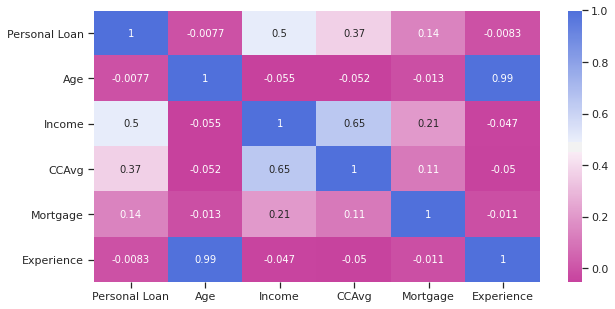

In [27]:
plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(1050,-100, as_cmap=True)
sns.heatmap(quant_df.corr(), cmap = cmap, annot = True);
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

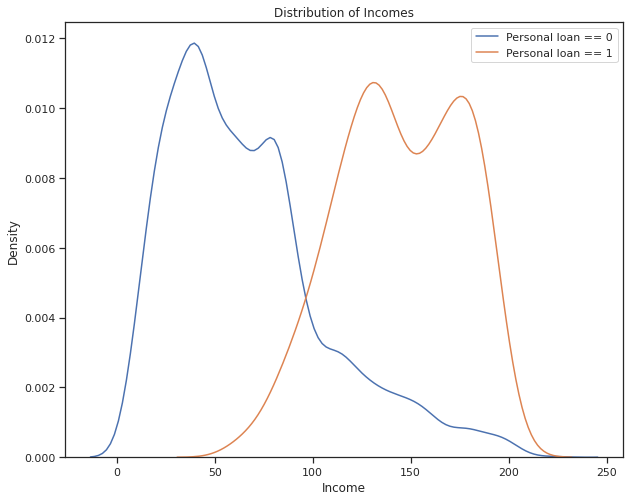

In [28]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(bank_data.loc[bank_data['Personal Loan'] == 0, 'Income'], label = 'Personal loan == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(bank_data.loc[bank_data['Personal Loan'] == 1, 'Income'], label = 'Personal loan == 1')

# Labeling of plot
plt.xlabel('Income'); plt.ylabel('Density'); plt.title('Distribution of Incomes');

People who have accepted the personal loan have average higher income. Similar analysis for Age, Mortgage, and CCAvg.

Splitting the data into training and testing dataset

In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_data.drop(['ID','ZIP Code','Experience'], axis=1), test_size=0.3 , random_state=100)

In [31]:
# Getting the Personal Loans separetly and drop from data
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LR_model=LogisticRegression(max_iter=500,solver='liblinear')
LR_model.fit(train_set,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(LR_model.score(train_set,train_labels))
print(LR_model.score(test_set,test_labels))

0.9525714285714286
0.9413333333333334


In [35]:
print(LR_model.coef_)
print(LR_model.intercept_)

[[-8.68846566e-03  4.35714934e-02  4.17477156e-01  7.29461413e-02
   1.28415741e+00  3.90665951e-04 -5.32592058e-01  2.90680939e+00
  -8.51392854e-01 -8.25147311e-01]]
[-9.74680664]


In [36]:
test_LRpred=LR_model.predict(test_set)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, test_LRpred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.86      0.53      0.66       158

    accuracy                           0.94      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [78]:
confusion_matrix(test_labels, test_LRpred)

array([[1328,   14],
       [  74,   84]])